### 【problem 1】Lagrange's steepest descent by the undetermined multiplier method

In [1]:
import numpy as np

In [12]:
class ScratchSVMClassifier():
    """
    Scratch implementation of SVM classifier

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    kernel : str
      Kernel type. Linear kernel (linear) or polynomial kernel (polly)
    threshold : float
      Threshold for choosing a support vector
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.n_support_vectors : int
      Number of support vectors
    self.index_support_vectors : The following form of ndarray, shape (n_support_vectors,)
      Support vector index
    self.X_sv :  The following forms of ndarray, shape (n_support_vectors, n_features)
      Support vector features
    self.lam_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector undetermined multiplier
    self.y_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector label

    """

    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # Record hyperparameters as attributes
        self.num_iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose

        # Default polynomial kernel parameters
        self.gamma = 1
        self.theta = 0
        self.degree = 2

    
    def kernel_function(self, x1, x2):
        if self.kernel == 'linear':
            return np.dot(x1, x2)
        elif self.kernel == 'polynomial':
            return (self.gamma * np.dot(x1, x2) + self.theta) ** self.degree
        else:
            raise ValueError("Unsupported kernel")
        
       
    def update_lambda(self, X, y, lambdas, i):
        n_samples = X.shape[0]
        sum_term = 0
        for j in range(n_samples):
            sum_term += lambdas[j] * y[j] * y[i] * self.kernel_function(X[i], X[j])
        new_lambda = lambdas[i] + self.lr * (1 - sum_term)
        return max(new_lambda, 0)


    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn the SVM classifier. If verification data is input, the accuracy for it is also calculated for each iteration.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """

        n_samples = X.shape[0]
        lambdas = np.zeros(n_samples)
        
        for iteration in range(self.num_iter):
            for i in range(n_samples):
                lambdas[i] = self.update_lambda(X, y, lambdas, i)
            
            if self.verbose:
                print(f"Iteration {iteration + 1}/{self.num_iter}")

        # Store support vectors    

        support_vector_indices = lambdas > self.threshold
        self.n_support_vectors = np.sum(support_vector_indices)
        self.index_support_vectors = np.where(support_vector_indices)[0]
        self.X_sv = X[support_vector_indices]
        self.lam_sv = lambdas[support_vector_indices]
        self.y_sv = y[support_vector_indices]



    def predict(self, X):
        """
        Estimate the label using the SVM classifier.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by SVM classifier
        """

        y_pred = []
        for x in X:
            decision_value = 0
            for i in range(self.n_support_vectors):
                decision_value += self.lam_sv[i] * self.y_sv[i] * self.kernel_function(self.X_sv[i], x)
            y_pred.append(np.sign(decision_value))
        return np.array(y_pred)
    
    def set_polynomial_params(self, gamma=1, theta=0, degree=2):
        self.gamma = gamma
        self.theta = theta
        self.degree = degree
    


### problem 4】Learning and estimation

In [8]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [13]:
# Generate a linearly separable dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=42)
y = np.where(y == 0, -1, 1)

In [14]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Initialize and train the Scratch SVM
svm_scratch = ScratchSVMClassifier(num_iter=1000, lr=0.01, verbose=True)
svm_scratch.fit(X_train, y_train)

Iteration 1/1000
Iteration 2/1000
Iteration 3/1000
Iteration 4/1000
Iteration 5/1000
Iteration 6/1000
Iteration 7/1000
Iteration 8/1000
Iteration 9/1000
Iteration 10/1000
Iteration 11/1000
Iteration 12/1000
Iteration 13/1000
Iteration 14/1000
Iteration 15/1000
Iteration 16/1000
Iteration 17/1000
Iteration 18/1000
Iteration 19/1000
Iteration 20/1000
Iteration 21/1000
Iteration 22/1000
Iteration 23/1000
Iteration 24/1000
Iteration 25/1000
Iteration 26/1000
Iteration 27/1000
Iteration 28/1000
Iteration 29/1000
Iteration 30/1000
Iteration 31/1000
Iteration 32/1000
Iteration 33/1000
Iteration 34/1000
Iteration 35/1000
Iteration 36/1000
Iteration 37/1000
Iteration 38/1000
Iteration 39/1000
Iteration 40/1000
Iteration 41/1000
Iteration 42/1000
Iteration 43/1000
Iteration 44/1000
Iteration 45/1000
Iteration 46/1000
Iteration 47/1000
Iteration 48/1000
Iteration 49/1000
Iteration 50/1000
Iteration 51/1000
Iteration 52/1000
Iteration 53/1000
Iteration 54/1000
Iteration 55/1000
Iteration 56/1000
I

In [16]:
# Predict and evaluate using the Scratch SVM
y_pred_scratch = svm_scratch.predict(X_test)
accuracy_scratch = metrics.accuracy_score(y_test, y_pred_scratch)
precision_scratch = metrics.precision_score(y_test, y_pred_scratch)
recall_scratch = metrics.recall_score(y_test, y_pred_scratch)
print(f"Scratch SVM - Accuracy: {accuracy_scratch * 100:.2f}%, Precision: {precision_scratch:.2f}, Recall: {recall_scratch:.2f}")


Scratch SVM - Accuracy: 100.00%, Precision: 1.00, Recall: 1.00


In [17]:
# Initialize and train the scikit-learn SVM
svm_sklearn = SVC(kernel='linear', C=1e10)
svm_sklearn.fit(X_train, y_train)

SVC(C=10000000000.0, kernel='linear')

In [18]:
# Predict and evaluate using the scikit-learn SVM
y_pred_sklearn = svm_sklearn.predict(X_test)
accuracy_sklearn = metrics.accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = metrics.precision_score(y_test, y_pred_sklearn)
recall_sklearn = metrics.recall_score(y_test, y_pred_sklearn)
print(f"Scikit-learn SVM - Accuracy: {accuracy_sklearn * 100:.2f}%, Precision: {precision_sklearn:.2f}, Recall: {recall_sklearn:.2f}")


Scikit-learn SVM - Accuracy: 100.00%, Precision: 1.00, Recall: 1.00


In [19]:
# Plot the decision boundary
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

### 【problem5】Visualization of decision area

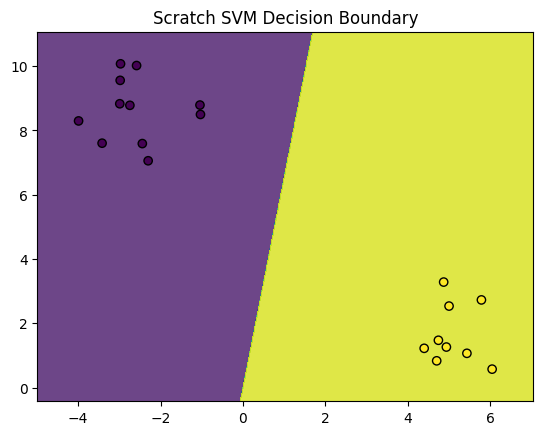

In [21]:
plot_decision_boundary(X_test, y_test, svm_scratch, "Scratch SVM Decision Boundary")


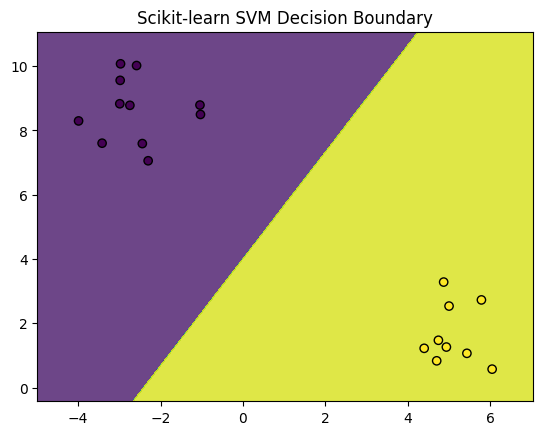

In [22]:
plot_decision_boundary(X_test, y_test, svm_sklearn, "Scikit-learn SVM Decision Boundary")

### 【problem 6】(Advance task) Creation of polynomial kernel function

In [23]:
# Initialize and train the Scratch SVM with polynomial kernel
svm_scratch_poly = ScratchSVMClassifier(num_iter=1000, lr=0.01, kernel='polynomial', verbose=True)
svm_scratch_poly.set_polynomial_params(gamma=1, theta=1, degree=2)
svm_scratch_poly.fit(X_train, y_train)

Iteration 1/1000
Iteration 2/1000
Iteration 3/1000
Iteration 4/1000
Iteration 5/1000
Iteration 6/1000
Iteration 7/1000
Iteration 8/1000
Iteration 9/1000
Iteration 10/1000
Iteration 11/1000
Iteration 12/1000
Iteration 13/1000
Iteration 14/1000
Iteration 15/1000
Iteration 16/1000
Iteration 17/1000
Iteration 18/1000
Iteration 19/1000
Iteration 20/1000
Iteration 21/1000
Iteration 22/1000
Iteration 23/1000
Iteration 24/1000
Iteration 25/1000
Iteration 26/1000
Iteration 27/1000
Iteration 28/1000
Iteration 29/1000
Iteration 30/1000
Iteration 31/1000
Iteration 32/1000
Iteration 33/1000
Iteration 34/1000
Iteration 35/1000
Iteration 36/1000
Iteration 37/1000
Iteration 38/1000
Iteration 39/1000
Iteration 40/1000
Iteration 41/1000
Iteration 42/1000
Iteration 43/1000
Iteration 44/1000
Iteration 45/1000
Iteration 46/1000
Iteration 47/1000
Iteration 48/1000
Iteration 49/1000
Iteration 50/1000
Iteration 51/1000
Iteration 52/1000
Iteration 53/1000
Iteration 54/1000
Iteration 55/1000
Iteration 56/1000
I

In [24]:
# Predict and evaluate using the Scratch SVM with polynomial kernel
y_pred_scratch_poly = svm_scratch_poly.predict(X_test)
accuracy_scratch_poly = metrics.accuracy_score(y_test, y_pred_scratch_poly)
precision_scratch_poly = metrics.precision_score(y_test, y_pred_scratch_poly)
recall_scratch_poly = metrics.recall_score(y_test, y_pred_scratch_poly)

In [25]:
print(f"Scratch SVM with Polynomial Kernel - Accuracy: {accuracy_scratch_poly * 100:.2f}%, Precision: {precision_scratch_poly:.2f}, Recall: {recall_scratch_poly:.2f}")


Scratch SVM with Polynomial Kernel - Accuracy: 100.00%, Precision: 1.00, Recall: 1.00


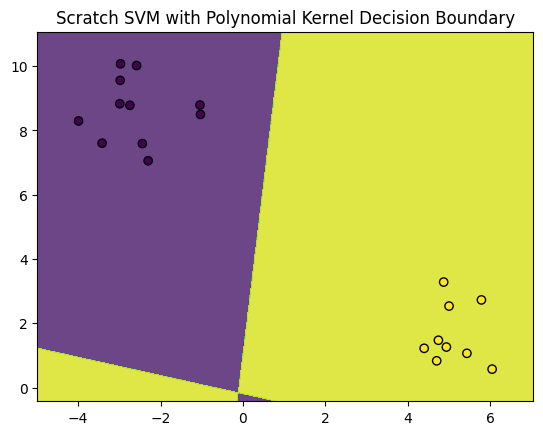

In [26]:
# Plot the decision boundary for polynomial kernel
plot_decision_boundary(X_test, y_test, svm_scratch_poly, "Scratch SVM with Polynomial Kernel Decision Boundary")